# Task - 02
# Linear Regression with Python Scikit Learn

## Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

### Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Data

In [3]:
stu_data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully.")

stu_data.head(5)

Data imported successfully.


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
stu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Data Size

In [5]:
stu_data.shape

(25, 2)

In [6]:
stu_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Checking for missing values

In [8]:
stu_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Here, we doesn't find any missing values. So, we can perform our prediction task.

### Plotting the given data

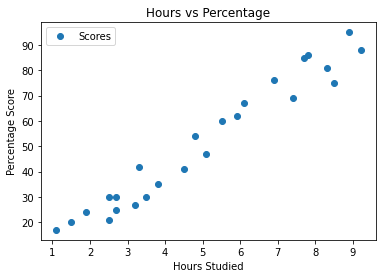

In [9]:
stu_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From observing the above plot we found, it is obvious that the Hours Studied are directly proportional to the Percentage score of the student.

### Data Preparation
Preparing the variables for prediction.

In [11]:
X = stu_data.iloc[:, :-1].values  
y = stu_data.iloc[:, 1].values  

Now, we have to split this data into training and test sets.

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Training the Algorithm

In [13]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


### Coefficient and Intercept of the line

In [14]:
print(regressor.coef_)
print(regressor.intercept_)

[9.91065648]
2.018160041434683


### Plotting the Test Data

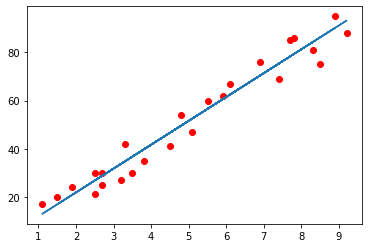

In [16]:
eq= regressor.coef_*X + regressor.intercept_
plt.scatter(X, y, color='r')
plt.plot(X, eq)
plt.show()

We have trained our algorithm successfully.

### Making Predictions

In [17]:
print(X_test) 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing Actual vs Predicted scores

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Our Prediction
Now, we have to predict the score for a student who will study 9.25 hours.

In [23]:
print('No. of Hours: 9.25','Predicted Score:',regressor.predict(np.array(9.25).reshape(-1,1)))

No. of Hours: 9.25 Predicted Score: [93.69173249]


### Model Evaluation
Model ealuation is an important step in the testing the accuracy of the model against the original data.

In [24]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
